# Kaggle: Don't Overfit! II

**Here I will attempt a random process to select features and find the ones that Gboost finds are the most important. My hope is that doing this enough times, I will converge to the features that are the most important individually, as well as in pairs, and perhaps even some in higher orders**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data preparation

In [3]:
train = pd.read_csv('train.csv')

In [37]:
X = train.drop(['id','target'],axis=1).values
y = train['target'].values

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
boost = GradientBoostingClassifier()

In [41]:
X.shape

(250, 300)

In [42]:
X_train.shape

(200, 300)

### Random process (testing)

In [28]:
choice = np.random.choice(np.arange(300),30,False)
choice

array([209,  14,  55, 175, 253,  42, 284, 170, 264, 286, 131, 257, 167,
       127,  44, 255, 256,  33,  18, 119, 189, 202, 214, 259, 151,  72,
        81, 292,  71,  29])

In [51]:
X_train[:,choice]

array([[ 0.041, -1.444,  0.351, ...,  0.558,  1.455, -0.305],
       [ 0.439, -0.984, -0.045, ...,  0.804, -0.716,  0.856],
       [-0.815, -0.366,  0.065, ..., -2.599, -0.24 ,  0.041],
       ...,
       [ 0.614,  0.924, -1.835, ...,  0.835,  0.06 ,  2.466],
       [-0.413, -0.427, -0.039, ..., -0.094, -0.951,  0.113],
       [ 2.121,  0.861, -2.801, ...,  1.985,  2.481, -1.035]])

In [53]:
boost.fit(X_train[:,choice],y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [55]:
boost.score(X_train[:,choice],y_train)

1.0

In [56]:
boost.score(X_test[:,choice],y_test)

0.78

In [57]:
boost.feature_importances_

array([0.01974122, 0.02417   , 0.03531917, 0.01962226, 0.0257573 ,
       0.01572241, 0.02623259, 0.0216621 , 0.03644467, 0.05315708,
       0.06878547, 0.02126413, 0.02572896, 0.03421396, 0.0326696 ,
       0.00237979, 0.02949256, 0.17381977, 0.02737388, 0.04640885,
       0.05544803, 0.03283375, 0.05469513, 0.01480115, 0.00536671,
       0.04591687, 0.00817575, 0.01546535, 0.01462686, 0.01270467])

In [58]:
max(boost.feature_importances_)

0.1738197687949971

In [59]:
min(boost.feature_importances_)

0.0023797850213459464

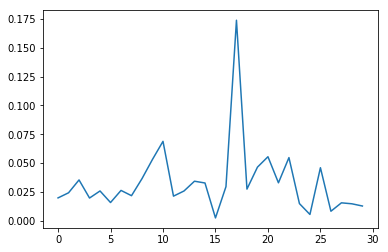

In [60]:
plt.plot(boost.feature_importances_)

**With 30 features, it appears that there are few that might be important, but most are about equally unimportant**<br>
**Try one more random sample**

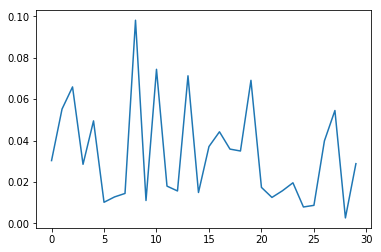

In [61]:
choice = np.random.choice(np.arange(300),30,False)
boost.fit(X_train[:,choice],y_train)
plt.plot(boost.feature_importances_)
plt.show()

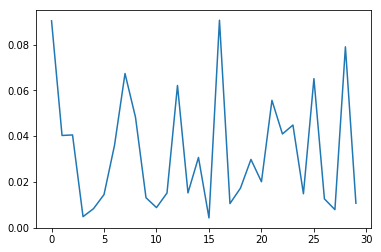

In [62]:
choice = np.random.choice(np.arange(300),30,False)
boost.fit(X_train[:,choice],y_train)
plt.plot(boost.feature_importances_)
plt.show()

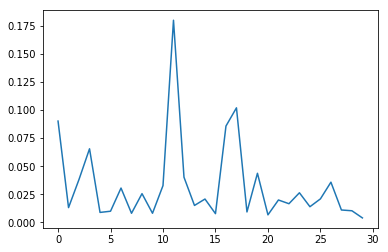

In [63]:
choice = np.random.choice(np.arange(300),30,False)
boost.fit(X_train[:,choice],y_train)
plt.plot(boost.feature_importances_)
plt.show()

**It appears that there are either a few somewhat important features ~(>0.05) or none (where all values are less than 0.1**

**I will keep track of the highest 5, and then specifically record anything that is above 0.15 for good measure**

In [67]:
np.argsort(boost.feature_importances_)[-5:]

array([ 3, 16,  0, 17, 11])

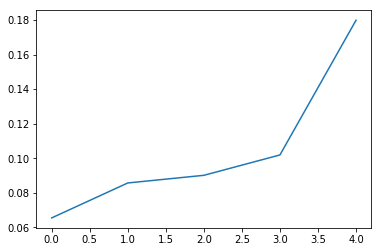

In [66]:
plt.plot(boost.feature_importances_[np.argsort(boost.feature_importances_)[-5:]])
plt.show()

**Retrieve the actualy feature numbers**

In [69]:
choice[np.argsort(boost.feature_importances_)[-5:]]

array([ 80, 117, 100, 133,  33])

In [77]:
choice[boost.feature_importances_>0.15]

array([33])

### Iterative process

In [78]:
choice = np.random.choice(np.arange(300),30,False)
boost.fit(X_train[:,choice],y_train)
print(choice[np.argsort(boost.feature_importances_)[-5:]])
print(choice[boost.feature_importances_>0.15])

[123  95 132 244 209]
[]


In [84]:
# number of iterations
iterations = 1
# number of total features
features = X_train.shape[1]
# number of features to select per fitting
select = features//10
# the top j features to mark
top = 5
# cutoff for 'best' features
best = 0.15
# number of times a feature has been in the top 5 (or some other number)
importance_ranked = np.zeros((features,top),dtype=int)
# number of times a feature has recieved very high ranking
important = np.zeros(features,dtype=int)

for i in range(iterations):
    choice = np.random.choice(np.arange(features),select,False)
    boost.fit(X_train[:,choice],y_train)
    # print for double checking
    print(choice[np.argsort(boost.feature_importances_)[-top:]])
    print(choice[boost.feature_importances_>best])
    # mark top features
    rank = top - 1
    for f in choice[np.argsort(boost.feature_importances_)[-top:]]:
        importance_ranked[f,rank]+= 1
        rank-=1
    for f in choice[boost.feature_importances_>best]:
        important[f]+=1

[279 133 225 116 117]
[]


In [90]:
importance_ranked[115:118]

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [89]:
importance_ranked[275:280]

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

**Seems to work**

In [93]:
def find_good_features(estimator,X,y,iterations,select_divide,top,best):
    # number of total features
    features = X.shape[1]
    # number of features to select per fitting
    select = features//select_divide
    # number of times a feature has been in the top 5 (or some other number)
    importance_ranked = np.zeros((features,top),dtype=int)
    # number of times a feature has recieved very high ranking
    important = np.zeros(features,dtype=int)

    for i in range(iterations):
        choice = np.random.choice(np.arange(features),select,False)
        estimator.fit(X[:,choice],y)
        # mark top features
        rank = top - 1
        for f in choice[np.argsort(boost.feature_importances_)[-top:]]:
            importance_ranked[f,rank]+= 1
            rank-=1
        for f in choice[boost.feature_importances_>best]:
            important[f]+=1
    
    return importance_ranked,important

In [94]:
r,i = find_good_features(boost,X_train,y_train,100,10,5,0.15)

**~18 seconds**

In [100]:
r.sum(axis=1)

array([ 0,  0,  0,  0,  8,  0,  2,  3,  0,  3,  2,  2,  0,  3,  1,  3,  7,
        0,  2,  0,  1,  0,  0,  2,  8,  0,  1,  0,  1,  2,  7,  0,  4,  7,
        0,  0,  0,  0,  8,  8,  0,  0,  0,  4,  0,  1,  1,  0,  7,  0,  3,
        0,  6,  1,  0,  1,  6,  0,  0,  1,  0,  0,  1,  4,  0, 11,  2,  0,
        1,  0,  1,  0,  1,  4,  0,  0,  8,  1,  0,  1, 10,  0,  7,  0,  1,
        0,  1,  0,  0,  6,  1, 11,  4,  1,  0,  1,  0,  0,  0,  0,  1,  1,
        0,  0,  2,  1,  0,  0,  1,  0,  0,  2,  0,  4,  0,  0, 11,  9,  1,
        9,  3,  0,  0,  2,  0,  0,  4,  0,  0,  2,  3,  1,  3, 14,  7,  1,
        0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  6,  1,  1,  8,  0,  0,
        0,  3,  0,  0,  2,  0,  1,  3,  0,  0,  2,  1,  9,  0,  0,  1,  0,
        2,  0,  0,  1,  0,  1,  1,  1,  0,  1,  5,  0,  0,  9,  0,  0,  0,
        0,  0,  8,  1,  2,  0,  0,  4,  1,  0,  0,  0,  1,  0, 12,  0,  0,
        0,  1,  0,  0,  0,  3,  0,  0,  0,  0,  4,  3,  0,  8,  0,  0,  3,
        1,  0,  0,  1,  3

**Several features are persistently low or high**<br>
Note: there aren't enough iterations yet to be able to rely on this though

In [101]:
i

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [103]:
(i>0).sum()

2

**0.15 is probably a bit too high**

Sanity check:

In [108]:
np.argsort(i)[::-1][:2]

array([33, 65])

In [109]:
np.argsort(r.sum(axis=1))[::-1][:10]

array([133, 201,  91,  65, 116,  80, 117, 165, 119, 183])

In [116]:
r[33]

array([7, 0, 0, 0, 0])

In [117]:
r[133]

array([1, 2, 3, 2, 6])

In this case, 33 is consistently ranked highest (0 row is the most important feature, and 5 is the 5th most imoprtant, so less important)<br>
Rank should be somehow taken into account

In [126]:
weights = np.array([5,4,3,2,1])
np.argsort(np.dot(r,weights))[::-1][:10]

array([ 65, 116, 201,  91, 117,  33,  24, 189, 119, 133])

**This looks better, 65 and 33 are now both in there**

### Intermediary prediction

In [129]:
for_fit = np.argsort(np.dot(r,weights))[::-1][:30]

In [131]:
boost.fit(X_train[:,for_fit],y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [132]:
boost.score(X_train[:,for_fit],y_train)

1.0

In [133]:
boost.score(X_test[:,for_fit],y_test)

0.68

In [134]:
test = pd.read_csv('test.csv')

In [135]:
submit = test.drop('id',axis=1)

In [153]:
pred = boost.predict_proba(submit.values[:,for_fit])

In [152]:
boost.predict(submit.values[:,for_fit])[0]

0.0

In [154]:
pred[0]

array([0.69530432, 0.30469568])

In [140]:
ids = test['id']

In [157]:
result = pd.DataFrame(pred[:,1],index=ids,columns=['target'])
result.head()

,target
id,
250,0.304696
251,0.597275
252,0.699243
253,0.965878
254,0.707593


In [158]:
result.to_csv('selected_1.csv')

**0.689! Already an improvement, now to run more iterations - in another notebook**